In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Read files in the playground
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e7/sample_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_submission.shape)

Train shape: (18524, 9)
Test shape: (6175, 8)
Sample submission shape: (6175, 2)


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [17]:
train.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [18]:
train["Personality"].value_counts(normalize=True)

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64

In [19]:
# Split columns by type
num_cols = train.select_dtypes(include=["int64", "float64"]).columns.drop("id")
cat_cols = train.select_dtypes(include=["object"]).columns.drop("Personality")

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

Numeric columns: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical columns: ['Stage_fear', 'Drained_after_socializing']



===== Time_spent_Alone =====
Summary statistics by Personality:
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12790.0  1.747146  1.537609  0.0  1.0  2.0  3.0  11.0
Introvert     4544.0  7.051937  2.645865  0.0  5.0  7.0  9.0  11.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

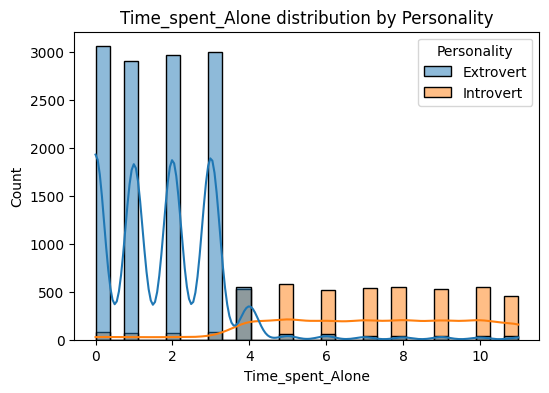


===== Social_event_attendance =====
Summary statistics by Personality:
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12967.0  6.389450  2.020741  0.0  5.0  6.0  8.0  10.0
Introvert     4377.0  1.934202  1.761425  0.0  1.0  2.0  3.0  10.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

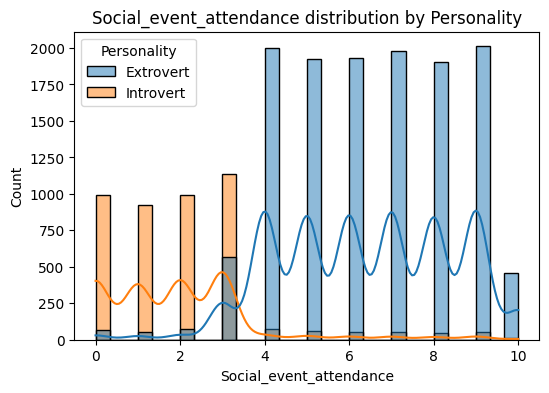


===== Going_outside =====
Summary statistics by Personality:
               count      mean       std  min  25%  50%  75%  max
Personality                                                      
Extrovert    12737.0  4.895894  1.434279  0.0  4.0  5.0  6.0  7.0
Introvert     4321.0  1.534136  1.513918  0.0  0.0  1.0  2.0  7.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

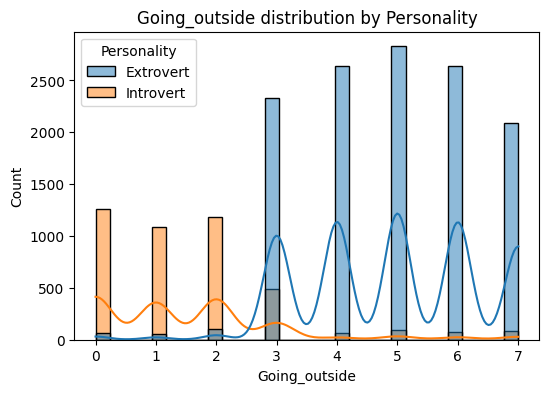


===== Friends_circle_size =====
Summary statistics by Personality:
               count      mean       std  min  25%   50%   75%   max
Personality                                                         
Extrovert    12999.0  9.624587  3.347242  0.0  7.0  10.0  12.0  15.0
Introvert     4471.0  3.263923  2.649747  0.0  1.0   3.0   4.0  15.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

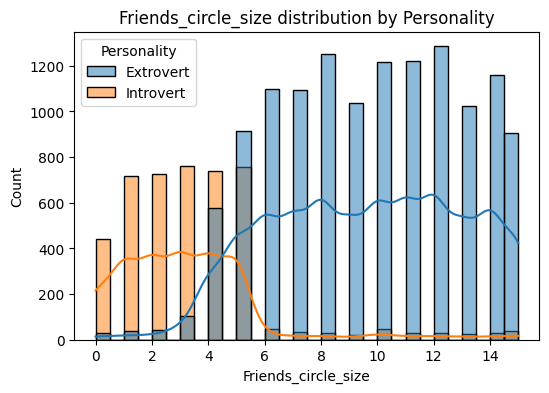


===== Post_frequency =====
Summary statistics by Personality:
               count      mean       std  min  25%  50%  75%   max
Personality                                                       
Extrovert    12922.0  6.113682  2.225713  0.0  4.0  6.0  8.0  10.0
Introvert     4338.0  1.611342  1.746218  0.0  0.0  1.0  2.0  10.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

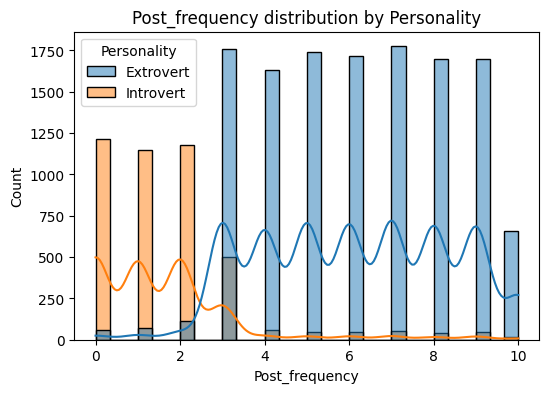

In [20]:
# Numeric features EDA
for col in num_cols:
    print(f"\n===== {col} =====")
    print("Summary statistics by Personality:")
    print(train.groupby("Personality")[col].describe())
    
    plt.figure(figsize=(6,4))
    sns.histplot(data=train, x=col, hue="Personality", kde=True, bins=30)
    plt.title(f"{col} distribution by Personality")
    plt.show()


===== Stage_fear =====
Value counts:
Stage_fear
No     12609
Yes     4022
NaN     1893
Name: count, dtype: int64

Cross-tab with Personality (row %):
Personality  Extrovert  Introvert
Stage_fear                       
No            0.976604   0.023396
Yes           0.058677   0.941323


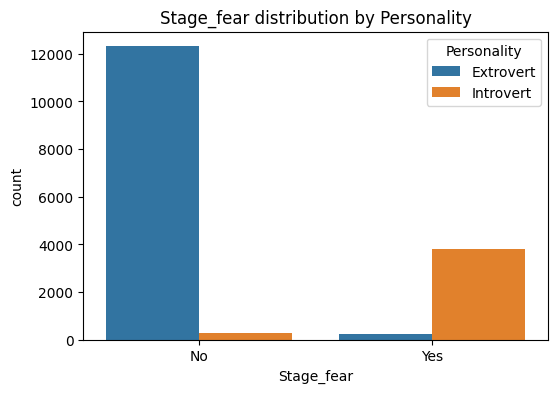


===== Drained_after_socializing =====
Value counts:
Drained_after_socializing
No     13313
Yes     4062
NaN     1149
Name: count, dtype: int64

Cross-tab with Personality (row %):
Personality                Extrovert  Introvert
Drained_after_socializing                      
No                          0.976564   0.023436
Yes                         0.058099   0.941901


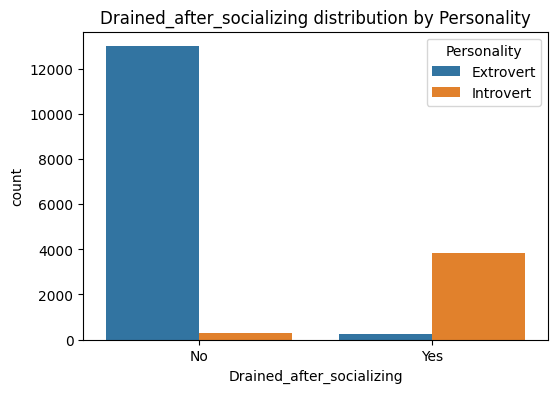

In [21]:
# Categorical features EDA
for col in cat_cols:
    print(f"\n===== {col} =====")
    print("Value counts:")
    print(train[col].value_counts(dropna=False))
    print("\nCross-tab with Personality (row %):")
    print(pd.crosstab(train[col], train["Personality"], normalize="index"))
    
    plt.figure(figsize=(6,4))
    sns.countplot(data=train, x=col, hue="Personality")
    plt.title(f"{col} distribution by Personality")
    plt.show()